In [117]:
from __future__ import division
import matplotlib.pyplot as plt
import scipy.fft as sp 
from scipy.fft import fft, fftfreq, fftshift
from math import pi as PI
import math
import cmath
import numpy as np
from scipy import signal
import random as rand
from scipy.fftpack import fft, ifft


# Для Вейвлет преобразования
from scipy.integrate import quad
from numpy import*
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


class FuncParams:
    def __init__(self, from_, to, ampl, omega, shift, N):
        self.From = from_
        self.To = to
        self.Ampl = ampl
        self.Omega = omega
        self.shift = shift
        self.N = N

class Function :
    x = []
    y = []
    
    def __init__(self, FuncParams):
      
       self.From = FuncParams.From
       self.To = FuncParams.To
       self.W = FuncParams.Omega
       self.N = FuncParams.N
       self.Shift = FuncParams.shift
       self.Ampl = FuncParams.Ampl

    def reset_x(self):
       # self.x.clear()
         self.x = np.linspace(self.From, self.To, self.N)

    def calc(self, func, *args, **func_args):
        self.reset_x()
        #for key, val in func_args.items():
         #   print(key, val)
        
        self.y = self.Ampl*func(self.W*(self.x+self.Shift), *args, **func_args)
    def plot(self, title=""):
        fig = plt.figure()
        fig.suptitle(title)
        subplot = fig.add_subplot(111)
        subplot.plot(self.x, self.y, 'b', marker='.')
               
        fig.show()

    def normalize(self, value):
        len_ = len(self.y)
        for i in range (0, len_):
            self.y[i] = self.y[i]/value

    def noize(self, intensity, level):
        if intensity >=0:
            increment = 1/intensity
            len_ = len(self.y)
            x = 0
            for i in range(0, len_):
                x+=increment
                if(x>=1):
                    x=0
                    self.y[i] += rand.uniform(-level, +level)

    def FFT(self):
        fft_lib_res = np.fft.fft(self.y)
        spacing_period = (self.From-self.To)/self.N

        xf = fftfreq(self.N, spacing_period)
        return [fftshift(xf), fftshift(fft_lib_res)]

    def IFFT(self):
        ifft_y = np.fft.ifft(self.y)
        #spacing_period = (self.From-self.To)/self.N

        ifft_x = np.linspace(self.From, self.To, len(ifft_y))
        return [ifft_x, ifft_y]
        
    

  
def get_step_Func(f_From, f_To, f_cut_From, f_cut_To, N_pts):
    #N_pts = get_points_numb(f_From, f_To, df)
    Step_Func = Function((FuncParams(f_From, f_To, 1, 1, 0, N_pts)))
    Step_Func.calc(step, f_cut_From, f_cut_To)
    return Step_Func
    

def normalize(y, val):
    for i in range(0, len(y)):
        y[i] = y[i]/val
    return y 

def get_module(y):
    res = []
    for i in range(len(y)):
        res.append(abs(y[i]))
    return res


def plot_y(y, title, From = 0, To = 0):
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(111)
    if(From != 0 or To != 0):
        x = np.linspace(From, To, len(y))
        sp.plot(x,y)
    else:
        sp.plot(y)
    fig.show()


def IFFT(x, y, from_, to_):
    ifft_y = np.fft.ifft(y)
    #spacing_period = (self.From-self.To)/self.N
    ifft_x = np.linspace(from_, to_, len(ifft_y))
    return [ifft_x, ifft_y]


def FFT(x, y, from_, to_, N):
    '''fft_lib_res = np.fft.fft(y)
    spacing_period = (from_ - to_ / N)

    xf = fftfreq(N, spacing_period)
    return [fftshift(xf), fftshift(fft_lib_res)]'''
    fft_lib_res = np.fft.fft(y)
    
    spacing_period = (to_ - from_)#(to_ - from_ / N)
    x_fft = []
    for i in range(0, len(fft_lib_res)):
        x_fft.append(i / spacing_period)
       
    return [x_fft, fft_lib_res]


def get_points_numb(t_from, t_to, dt):
    return int((t_to - t_from) / dt)


def get_sample_rate(pts_numb, t_from, t_to):
    return int(pts_numb / (t_to - t_from))


def step(x, *args, **kwargs):
    step_from_, step_to_ = args # откуда до куда будут ненулевые значения
                                               # + область определения функции
    
    samples_num = len(x)
    numb_of_pts_within = 0
    
    for x_ in x:
        if step_from_<=x_<=step_to_:
            numb_of_pts_within+=1 # колво точек попадающих в область ступеньки
    
    step_height = 1#1/numb_of_pts_within
    y = []
    for i in range(0, len(x)):
        if step_from_<=x[i]<=step_to_:
            y.append(step_height)
        else:
            y.append(0)
        
    return y

# Получение неидеального фильтра - От синкуса надо оставить часть точек, а остальное добить нулями
# Пробуем оставить часть точек синкуса, а остальные добить нулями
def cut_filter(Pts_to_keep, y_filt):
    Pts_to_keep_left = []
    Pts_to_keep_right = []
    if(Pts_to_keep%2 == 0):
        Pts_to_keep_aside = int(Pts_to_keep / 2)
        print(Pts_to_keep_aside)
        how_many_zeros = len(y_filt) - Pts_to_keep
        Pts_to_keep_left = y_filt[0 : Pts_to_keep_aside]
        Pts_to_keep_right = y_filt[ len(y_filt) - Pts_to_keep_aside : len(y_filt)]
        res = np.concatenate([Pts_to_keep_left, np.zeros(how_many_zeros)])
        res = np.concatenate([res, Pts_to_keep_right])
        return res

def adjust_filter(y):
    #print('len x = ', len(x))
    #x = change_halves(x, len(x)%2 == 0)
    y = change_halves(y, len(y)%2 == 0)
    return y

def mirror_func(x, y):
    x_ = list(x)
    x_ = np.flip(x)
    x_ = [-i for i in x_]
    x_ = np.concatenate([x_, x])
    
    y_ = list(y)
    y_ = np.flip(y_)
    y_  = np.concatenate([y_, y])
    return [x_, y_]

def change_halves(x, is_even):
    x_ = []
    if(is_even):
        x_ = x[len(x)//2 : ]
        print('x even len half x = ', len(x_))
        x_ = np.concatenate([x_, x[ : len(x)//2]])
    else:
        print('x not even')
        x_ = x[len(x)//2 : ]
        x_ = np.concatenate([x_, x[ : len(x)//2]])
    return x_

def plot(x, y, title):
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(111)
    sp.plot(x, y)
    fig.show()
    
    
def get_FFT_cut(Func):
    [x_fft, y_fft] = FFT(Func.x, Func.y, Func.From, Func.To, Func.N)
    x_fft_cut = x_fft[0 : len(x_fft)//2]
    y_fft_cut = y_fft[0: len(y_fft)//2]
    return [x_fft_cut, y_fft_cut]


def get_fourier_of_filtered_signal(src_spectrum, step):
    y_res = []
    if(len(src_spectrum) == len(step)):
        for i in range(len(src_spectrum)):
            y_res.append(src_spectrum[i] * step[i])
    return y_res
    
    
def plot_func_and_FFT(x, y, title, freq_limits):
    To = x[len(x)-1]
    From = x[0]
    fig = plt.figure()
    fig.suptitle(title)
    sp = fig.add_subplot(121)
    sp.plot(x, y, label = 'src func')
    sp.legend()
    
    [x_fft, y_fft] = FFT(x, y, From, To, len(x))
    sp = fig.add_subplot(122)
    sp.set_xlim(freq_limits)
    sp.plot(x_fft, abs(y_fft), label = 'Fourier')
    sp.legend()
    
    fig.show()
    return fig
    
    

def MexicanHat2ndOrder(t):
    return (1-t**2)*exp(-0.5*(t**2))

def Gauss1stOrder(t):
    return -t * exp(-(t**2) / 2)

def DOG(t):
    return exp(-2 * t**2) - 0.5 * exp( - (1/8) * t**2 )

def LittlewoodPaley(t):
    return ((np.pi * t+0.0001)**(-1)) * (sin(2 * np.pi * t) - sin(np.pi * t))
                
                  

def integrate(a,b, N, wavelet_func, Function):    
    f = lambda t : (1 / a**0.5) * wavelet_func((t - b) / a)*Function(t)#S(t)
    r= quad(f, -N, N)
    return round(r[0],3)

def calc_wavelet(a_arr, b_arr, N, wavelet_func, Function):
    z = array([integrate(a,b, N, wavelet_func, Function) for b in b_arr for a in a_arr])
    return z


def plot_src_func(SourceFunc, t_from, t_to, dt, title_):
    N = get_points_numb(t_from, t_to, dt)
    Func = Function((FuncParams(t_from, t_to, 1, 1, 0, N)))
    Func.reset_x()
    
    Func.y = []
    for i in Func.x:
        Func.y.append(SourceFunc(i))
    Func.plot(title = title_)
    
def plot_wavelet_res(A, B, Z):
    fig = plt.figure("Wavelet Spectrum")
    ax = Axes3D(fig)
    ax.plot_surface(A, B, Z, rstride=1, cstride=1, cmap=cm.jet)
    ax.set_xlabel(' Parameter a (Scale)')
    ax.set_ylabel('Parameter b (Shift)')
    ax.set_zlabel('Wavelet Transform Amplitude: $ N_{ab}$')
    plt.figure("2D-graph, z = w (a,b)")
    plt.title('2D-graph, z = w (a,b)', size=12)
    plt.contourf(A, B, Z, 100)
    plt.show()

def do_wavelet(a_lim, b_lim, integral_lim, wavelet_func, Function):
    
    a_arr = arange(a_lim[0], a_lim[1], 1)
    b_arr = arange(b_lim[0], b_lim[1], 1)

    z = calc_wavelet(a_arr, b_arr, integral_lim, wavelet_func, Function)#MexicanHat2ndOrder)


    A, B = meshgrid(a_arr, b_arr)
    
    a_max = a_lim[1]
    a_min = a_lim[0]
    b_max = b_lim[1]
    b_min = b_lim[0]
    Z = z.reshape(a_max-a_min, b_max-a_min)
    plot_wavelet_res(A, B, Z)
    

    
def plot_wavelet(x_from, x_to, dx, wavelet_func, a, b, wavelet_func_name, freq_limits):
    x= arange(x_from, x_to, dx)
    y=[(1 / a**(0.5)) * wavelet_func((t-b) / a) for t in x]
    
    plot_func_and_FFT(x, y, 'Wavelet Func is' + str(wavelet_func_name) + ', a = ' + str(a) + ' b = ' + str(b), freq_limits)

    
def plot_multiple_wavelets(fig, x_from, x_to, dx, wavelet_func, a, b, wavelet_func_name, freq_limits):
    x= arange(x_from, x_to, dx)
    
    y=[(1 / a**(0.5)) * wavelet_func((t-b) / a) for t in x]
    
    fig = plot_wavelet_func_and_FFT(fig, x, y, str(wavelet_func_name) + ', a = ' + str(a) + ' b = ' + str(b), freq_limits)
    return fig

def plot_wavelet_func_and_FFT(fig, x, y, legend, freq_limits):
    To = x[len(x)-1]
    From = x[0]
    sp = fig.add_subplot(121)
    sp.plot(x, y, label = 'Source is ' + str(legend))
    sp.legend()
    
    [x_fft, y_fft] = FFT(x, y, From, To, len(x))
    x_fft = [i*10 for i in x_fft]
    sp = fig.add_subplot(122)
    sp.set_xlim(freq_limits)
    sp.plot(x_fft, abs(y_fft), label = 'Fourier ' + str(legend))
    sp.legend()
    
    fig.show()
    return fig
    


<ipython-input-117-6d97c9f38752>:359: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-117-6d97c9f38752>:348: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sp = fig.add_subplot(121)
<ipython-input-117-6d97c9f38752>:354: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sp = fig.add_subplot(122)
<ipython-input-117-6d9

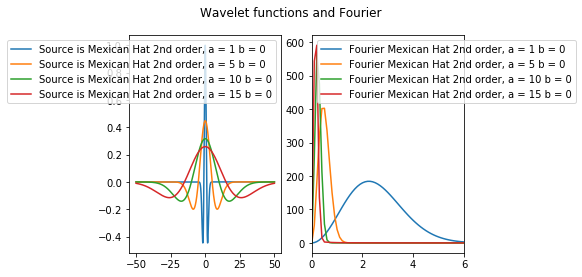

In [118]:
fig = plt.figure()
fig.suptitle('Wavelet functions and Fourier')
upper_lim = 6
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, MexicanHat2ndOrder, 1, 0, 'Mexican Hat 2nd order', [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, MexicanHat2ndOrder, 5, 0, 'Mexican Hat 2nd order', [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, MexicanHat2ndOrder, 10, 0, 'Mexican Hat 2nd order', [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, MexicanHat2ndOrder, 15, 0, 'Mexican Hat 2nd order', [0,upper_lim])



<ipython-input-117-6d97c9f38752>:359: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-117-6d97c9f38752>:348: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sp = fig.add_subplot(121)
<ipython-input-117-6d97c9f38752>:354: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sp = fig.add_subplot(122)
<ipython-input-117-6d9

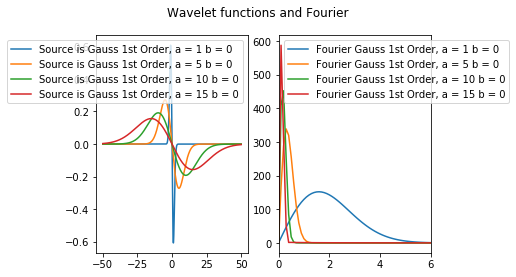

In [119]:
fig = plt.figure()
fig.suptitle('Wavelet functions and Fourier')
upper_lim = 6
name = 'Gauss 1st Order'
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, Gauss1stOrder, 1, 0, name, [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, Gauss1stOrder, 5, 0, name, [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, Gauss1stOrder, 10, 0, name, [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, Gauss1stOrder, 15, 0, name, [0,upper_lim])


<ipython-input-117-6d97c9f38752>:359: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-117-6d97c9f38752>:348: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sp = fig.add_subplot(121)
<ipython-input-117-6d97c9f38752>:354: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sp = fig.add_subplot(122)
<ipython-input-117-6d9

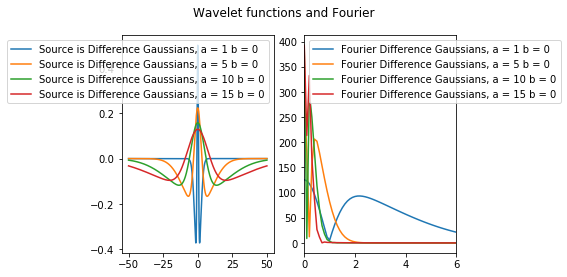

In [120]:
fig = plt.figure()
fig.suptitle('Wavelet functions and Fourier')
upper_lim = 6
name = 'Difference Gaussians'
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, DOG, 1, 0, name, [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, DOG, 5, 0, name, [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, DOG, 10, 0, name, [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, DOG, 15, 0, name, [0,upper_lim])


<ipython-input-117-6d97c9f38752>:359: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-117-6d97c9f38752>:348: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sp = fig.add_subplot(121)
<ipython-input-117-6d97c9f38752>:354: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  sp = fig.add_subplot(122)
<ipython-input-117-6d9

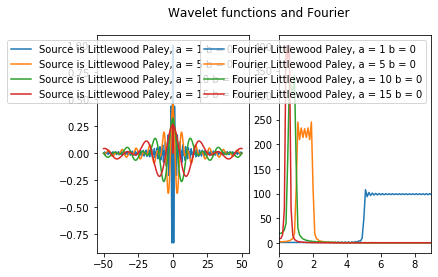

In [121]:
fig = plt.figure()
fig.suptitle('Wavelet functions and Fourier')
upper_lim = 9
name = 'Littlewood Paley'
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, LittlewoodPaley, 1, 0, name, [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, LittlewoodPaley, 5, 0, name, [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, LittlewoodPaley, 10, 0, name, [0,upper_lim])
fig = plot_multiple_wavelets(fig, -50, 50, 0.01, LittlewoodPaley, 15, 0, name, [0,upper_lim])


<ipython-input-117-6d97c9f38752>:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


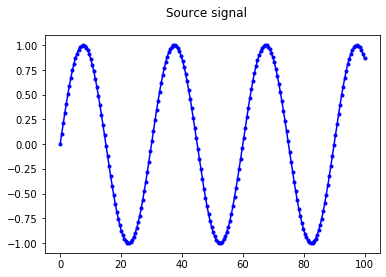

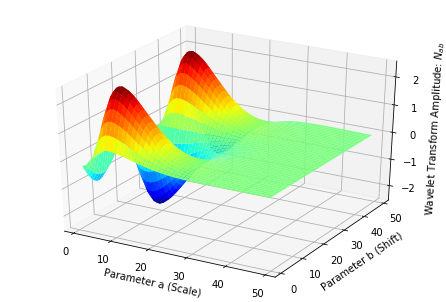

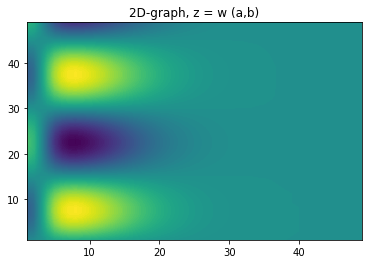

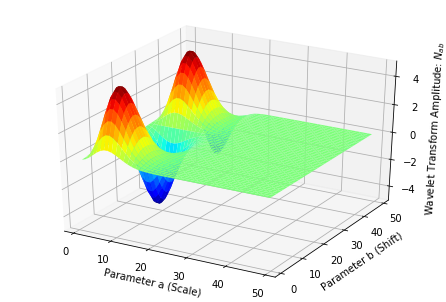

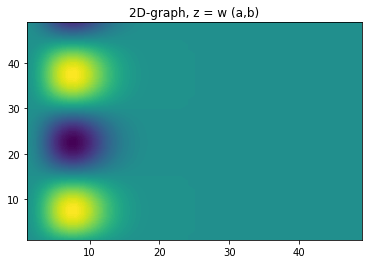

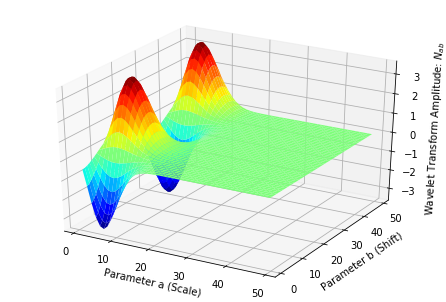

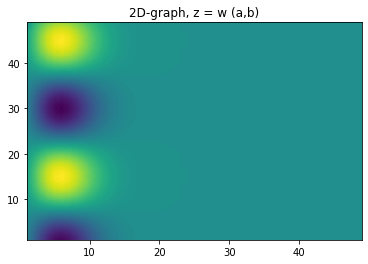

In [122]:
def F(t):
    T = 30
    return sin(2*pi*t/T)

Func = F
plot_src_func(F, 0, 100, 0.5, 'Source signal')
do_wavelet([1,50], [1,50], 256, DOG, Func)
do_wavelet([1,50], [1,50], 256, MexicanHat2ndOrder, Func)
do_wavelet([1,50], [1,50], 256, Gauss1stOrder, Func)
#do_wavelet([1,50], [1,50], 256, LittlewoodPaley, Func)


<ipython-input-117-6d97c9f38752>:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


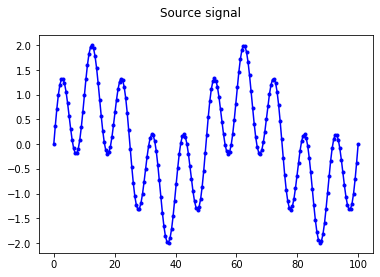

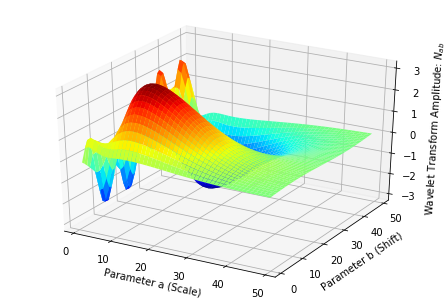

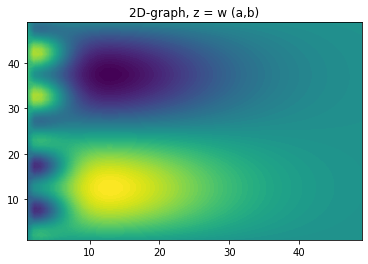

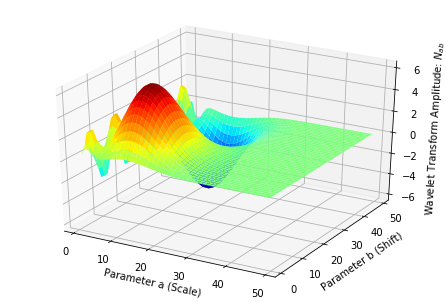

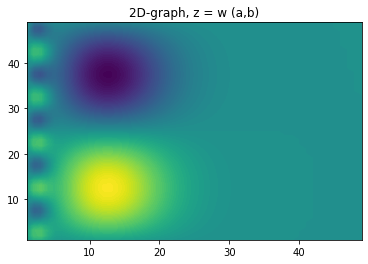

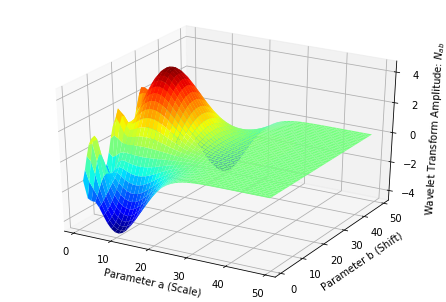

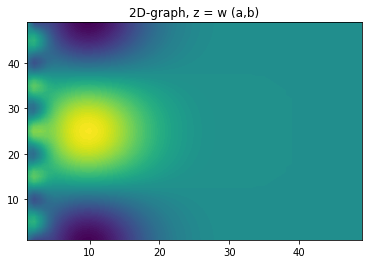

In [123]:
def Sum_sin(t):
    return sin(2*pi*t/10)+sin(2*pi*t/50)
   
Func = Sum_sin
plot_src_func(Func, 0, 100, 0.5, 'Source signal')
do_wavelet([1,50], [1,50], 256, DOG, Func)
do_wavelet([1,50], [1,50], 256, MexicanHat2ndOrder, Func)
do_wavelet([1,50], [1,50], 256, Gauss1stOrder, Func)
#do_wavelet([1,50], [1,50], 256, LittlewoodPaley, Func)

<ipython-input-110-6d97c9f38752>:281: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  r= quad(f, -N, N)
<ipython-input-110-6d97c9f38752>:281: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  r= quad(f, -N, N)
<ipython-input-110-6d97c9f38752>:281: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  r= quad(f, -N, N)
<ipython-input-110-6d97c9f

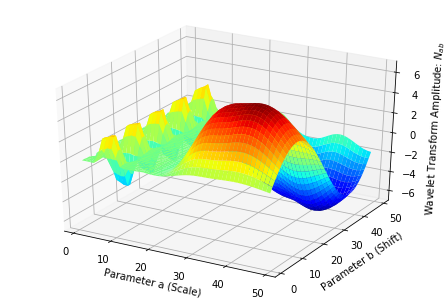

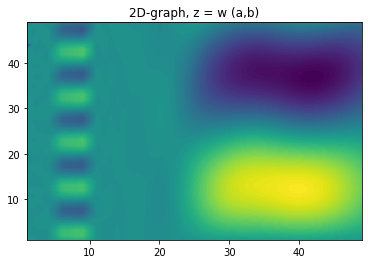

In [116]:
do_wavelet([1,50], [1,50], 100, LittlewoodPaley, Sum_sin)

<ipython-input-117-6d97c9f38752>:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


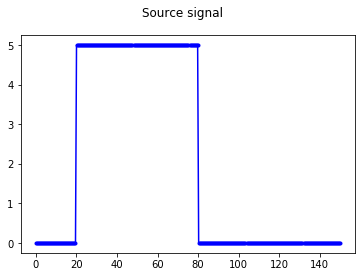

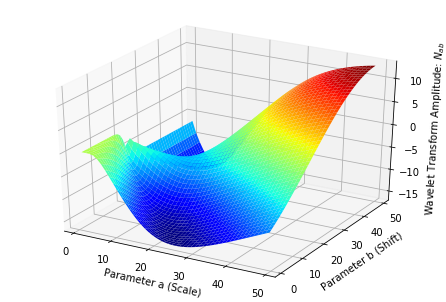

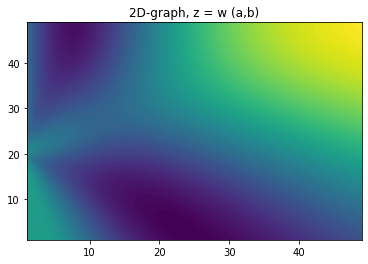

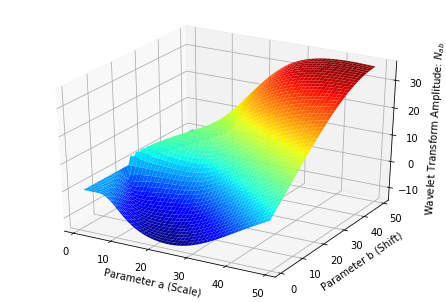

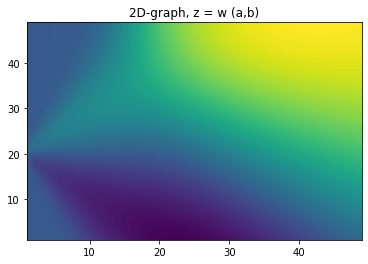

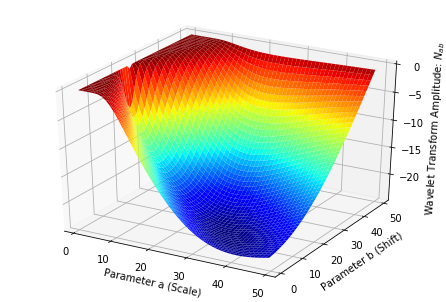

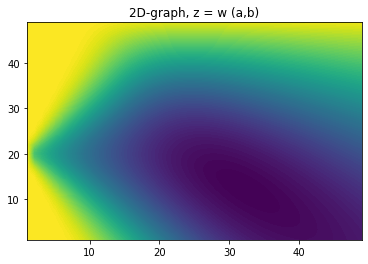

In [125]:
def Square(t):
    left_lim = 20
    right_lim = 80
    ampl = 5
    if left_lim <= t <= right_lim:
        return ampl
    else:
        return 0

Func = Square
plot_src_func(Square, 0, 150, 0.5, 'Source signal')
do_wavelet([1,50], [1,50], 256, DOG, Func)
do_wavelet([1,50], [1,50], 256, MexicanHat2ndOrder, Func)
do_wavelet([1,50], [1,50], 256, Gauss1stOrder, Func)